In [1]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import avg
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize Spark session
spark = SparkSession.builder.appName("CarPricesAnalysis").getOrCreate()

# Load the dataset
file_path = "C:/Users/acdsa/Desktop/BDA/lab2/Lab2/New folder/car_prices.csv"
car_prices_df = spark.read.csv(file_path, header=True, inferSchema=True)

# Show the schema
car_prices_df.printSchema()

root
 |-- Brand: string (nullable = true)
 |-- Model: string (nullable = true)
 |-- Year: integer (nullable = true)
 |-- Engine_Size: double (nullable = true)
 |-- Fuel_Type: string (nullable = true)
 |-- Transmission: string (nullable = true)
 |-- Mileage: integer (nullable = true)
 |-- Doors: integer (nullable = true)
 |-- Owner_Count: integer (nullable = true)
 |-- Price: integer (nullable = true)



In [2]:
avg_price_by_brand = car_prices_df.groupBy("Brand").agg(avg("Price").alias("Average_Price"))
avg_price_by_brand.show()

+----------+-----------------+
|     Brand|    Average_Price|
+----------+-----------------+
|Volkswagen|8928.377450980392|
|       Kia| 8880.08606557377|
| Chevrolet|9015.683948155533|
|   Hyundai|8778.279396984924|
|     Honda|8665.596630327056|
|      Audi| 8929.37379576108|
|  Mercedes|8980.087048832273|
|       BMW|8704.068068068069|
|    Toyota|8798.184536082474|
|      Ford|8852.570610687022|
+----------+-----------------+



In [3]:
car_count_by_fuel_transmission = car_prices_df.groupBy("Fuel_Type", "Transmission").count()
car_count_by_fuel_transmission.show()

+---------+--------------+-----+
|Fuel_Type|  Transmission|count|
+---------+--------------+-----+
|   Petrol|Semi-Automatic|  804|
|   Hybrid|     Automatic|  819|
| Electric|Semi-Automatic|  851|
|   Diesel|Semi-Automatic|  839|
|   Petrol|     Automatic|  790|
|   Hybrid|        Manual|  817|
| Electric|        Manual|  893|
|   Diesel|        Manual|  846|
| Electric|     Automatic|  881|
|   Petrol|        Manual|  816|
|   Diesel|     Automatic|  827|
|   Hybrid|Semi-Automatic|  817|
+---------+--------------+-----+



In [4]:
top_expensive_cars = car_prices_df.orderBy(car_prices_df["Price"].desc()).limit(5)
top_expensive_cars.show()

+------+--------+----+-----------+---------+------------+-------+-----+-----------+-----+
| Brand|   Model|Year|Engine_Size|Fuel_Type|Transmission|Mileage|Doors|Owner_Count|Price|
+------+--------+----+-----------+---------+------------+-------+-----+-----------+-----+
|Toyota| Corolla|2021|        4.7| Electric|   Automatic|  14924|    5|          3|18301|
|  Audi|      A3|2023|        5.0|   Hybrid|   Automatic|  12234|    5|          5|18255|
|  Ford|Explorer|2020|        4.8| Electric|   Automatic|  19112|    4|          5|18017|
| Honda|  Accord|2022|        4.0| Electric|   Automatic|  14658|    4|          2|17906|
| Honda|    CR-V|2023|        4.6|   Hybrid|   Automatic|  10046|    4|          4|17899|
+------+--------+----+-----------+---------+------------+-------+-----+-----------+-----+



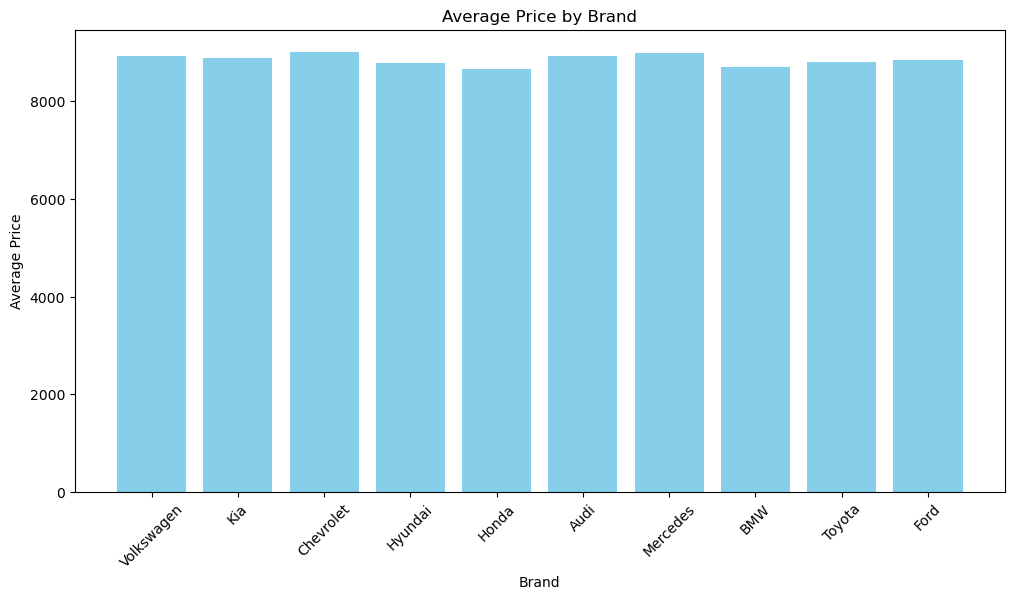

In [5]:
# Convert to Pandas
avg_price_by_brand_pd = avg_price_by_brand.toPandas()

# Plot
plt.figure(figsize=(12, 6))
plt.bar(avg_price_by_brand_pd["Brand"], avg_price_by_brand_pd["Average_Price"], color='skyblue')
plt.title("Average Price by Brand")
plt.xlabel("Brand")
plt.ylabel("Average Price")
plt.xticks(rotation=45)
plt.show()

C:\Users\acdsa\AppData\Local\Temp\ipykernel_18740\2898054886.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Fuel_Type", y="count", data=car_count_by_fuel_pd, palette="viridis")


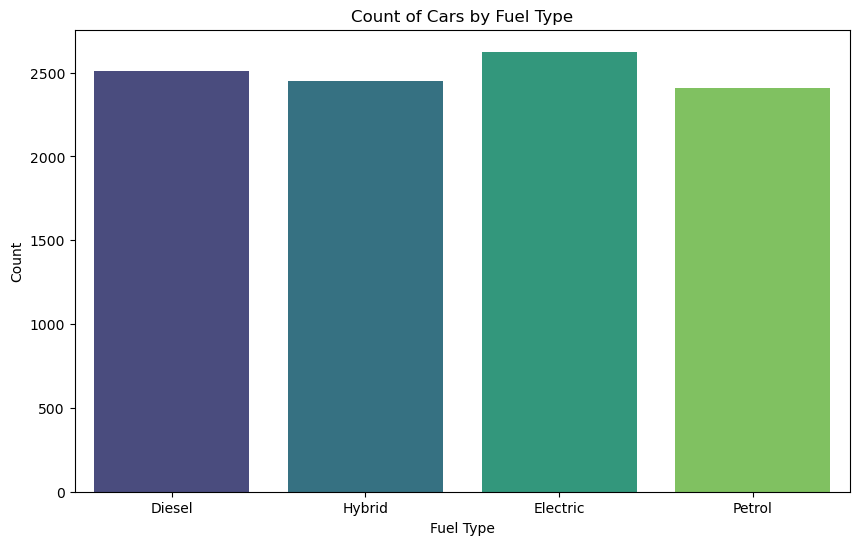

In [6]:
# Convert to Pandas
car_count_by_fuel_pd = car_prices_df.groupBy("Fuel_Type").count().toPandas()

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x="Fuel_Type", y="count", data=car_count_by_fuel_pd, palette="viridis")
plt.title("Count of Cars by Fuel Type")
plt.xlabel("Fuel Type")
plt.ylabel("Count")
plt.show()

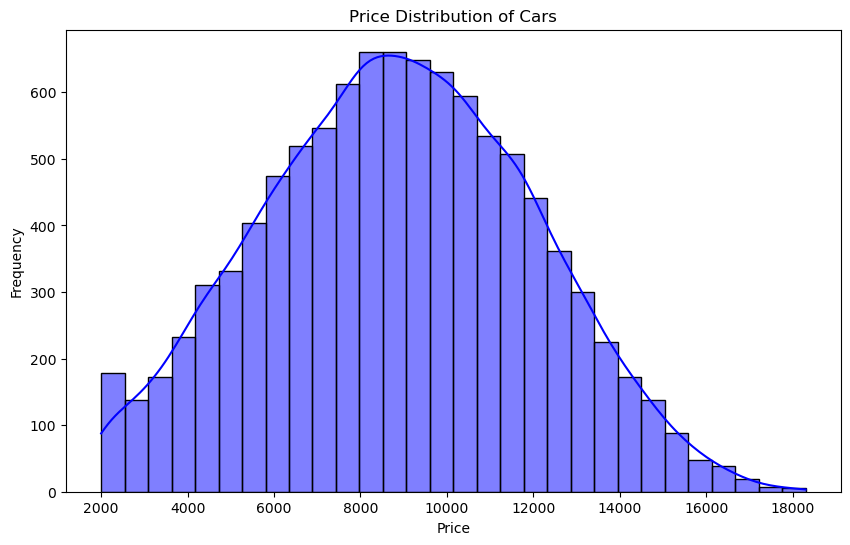

In [7]:
# Convert to Pandas
car_prices_pd = car_prices_df.select("Price").toPandas()

# Plot
plt.figure(figsize=(10, 6))
sns.histplot(car_prices_pd["Price"], bins=30, kde=True, color="blue")
plt.title("Price Distribution of Cars")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()